In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - 4*x + 2

In [3]:
f(2)

6

In [4]:
x_rand = np.arange(-10,10,0.5)
y = f(x_rand)

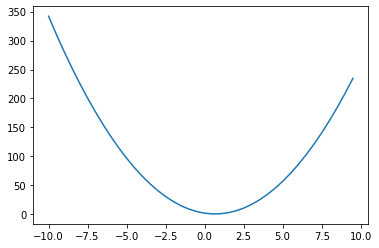

In [5]:
plt.plot(x_rand , y)

**Let's think**

- Now let's thing what is the derivative of this function at any point x?
- Check the defination of derivative, see what actually derivate tells us rather than just calculating it.

In [6]:
# Checking derivative

h = 0.000000001
x = 2.5
derivative = (f(x + h) - f(x))/h
derivative

11.000000910144081

## More than 2 inputs

In [7]:
h = 0.000001

#inputs

a = 2.0
b = 3.0
c = -1.5

# let's check d derivative w.r.t a
d1 = a * b + c
print('d1 : ', d1)
a += h
d2 = a * b + c
print('d2 : ', d2)

# let's check derivative now
print('slope : ', (d2 - d1)/h)

d1 :  4.5
d2 :  4.500003
slope :  3.000000000419334


In [8]:
# Let's do the same derivative check for b

# Checking the value of d without any change in b
print('d1 : ', d1)

# reversing the change that we did on a
a -= h

# doing some change in a
b += h

d3 = a * b + c
print('d3 : ',d3)

# let's check the derivative now

print('slope : ', (d3 - d1)/h)

d1 :  4.5
d3 :  4.500002
slope :  2.000000000279556


In [9]:
# Let's do the same derivative check for c

# Checking the value of d without any change in c
print('d1 : ', d1)

# reversing the change that we did on b
b -= h

# doing some change in c
c += h

d3 = a * b + c
print('d3 : ',d3)

# let's check the derivative now

print('slope : ', (d3 - d1)/h)

d1 :  4.5
d3 :  4.500001
slope :  1.000000000139778


## Value Object (Data Structure)

In [16]:
class Value:
    
    def __init__(self, data, _children=(), _op = '', label = ''):
        self.data = data
        self._prev = set(_children)
        self._op = _op  # For operations
        self.label = label
        self.grad = 0.0
    
    # This repr function is very useful as if we will not use this value then we will
    # Get some kind of ugly ouput which is not understandable for end users
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        ans =  Value(self.data + other.data, (self, other) , '+')
        return ans
    
    def __mul__(self,other):
        ans =  Value(self.data * other.data, (self, other), '*')
        return ans

In [17]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [20]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f }" % (n.label, n.data), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

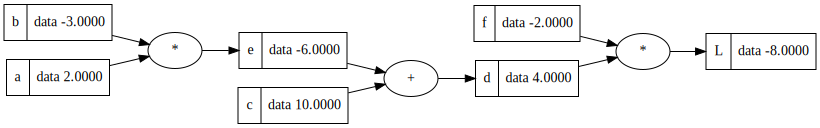

In [21]:
# Visualizing Forward Pass

draw_dot(L)

## Backward Pass

- As we know backward pass is mainly termed as Backpropagation.
- Backpropagation is simply derivative of final output with respect to it's leaf nodes
- Here with the term lead node I mean all those parameters which are not fixed from start. Some of the examples are Weights.

In [22]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [23]:
L.grad = 1.0

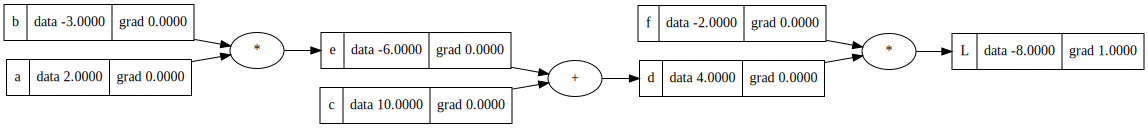

In [24]:
draw_dot(L)

In [49]:
def deriv():
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L
    
    h = 0.00001
    
    # Derivative
    
    a = Value(2.0 , label='a')
    b = Value(-3.0 , label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c;d.label = 'd'
    f = Value(-2.0, label='f')
    d.data += h
    L = d * f; L.label = 'L'
    L2 = L
    
    print((L2.data - L1.data)/h)
    
    
    
    

In [50]:
deriv()

-1.9999999999242843


In [51]:
d.grad = f.data
f.grad = d.data

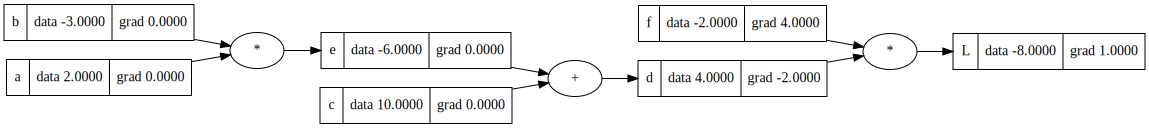

In [52]:
draw_dot(L)

**Here comes the most interesting part of Backpropagation**

$ dL/dc $

- As we knew that c node don't actually interact with final output L but indirectly it does ,as c affects d and d affects L

***Here we can use Chain Rule of Calculus***

- $ dL/dc = (dL/dd) * (dd/dc) $ 

- As knew $d = c + e$ 

So the $dd/dc = 1.0$

**In the end - **

$dl/dc = (f.data) * 1.0$

In [54]:
c.grad = f.data
e.grad = f.data # same as of c

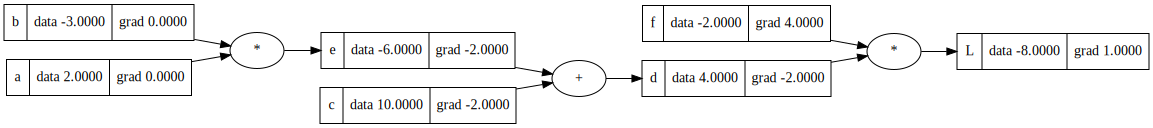

In [55]:
draw_dot(L)

- Now we will use that same chain rule of calculus here again 

* $ dL/db = dl/dd* dd/de * de/db $
* $e = a * b$

##### So with the help of calculus
* $de/db = a$

In [56]:
b.grad = (a.data) * (1.0) * (f.data)
a.grad = (b.data) * (1.0) * (f.data)

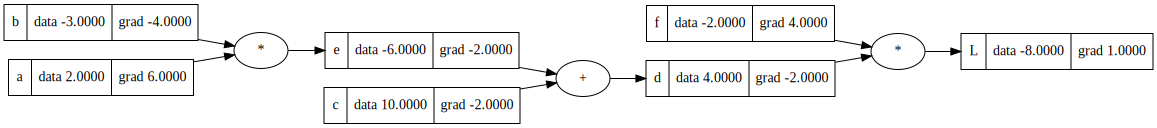

In [57]:
draw_dot(L)

In [58]:
# We can check our work with the help of deriv function whether we did correct or not

In [59]:
def deriv():
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L
    
    h = 0.00001
    
    # Derivative
    
    a = Value(2.0 , label='a')
    b = Value(-3.0 , label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c;d.label = 'd'
    f = Value(-2.0, label='f')
    d.data += h
    L = d * f; L.label = 'L'
    L2 = L
    
    print((L2.data - L1.data)/h)


In [60]:
deriv()

-1.9999999999242843
